In [1]:
using Plots,LaTeXStrings;

In [12]:
gr(titlefontsize=11
    ,guidefontsize=12,tickfontsize=11,legendfontsize=9,
    bg_color_legend = RGBA(1,1,1,0.15), markerstrokecolor= :auto)

Plots.GRBackend()

In [2]:
mπ=0.134;
mσ=0.6;
mN=0.939;

# Nuclear Physics A 829 (2009) 170–209

In [3]:
pyplot();

In [3]:
function xsqrt(x)
    imag(x) >=0 ? sqrt(x+0im) : -sqrt(x-0im)
end

xsqrt (generic function with 1 method)

In [4]:
zσ(z,k)=z+mσ-sqrt(k^2+mσ^2)-sqrt(k^2+mN^2)

zσ (generic function with 1 method)

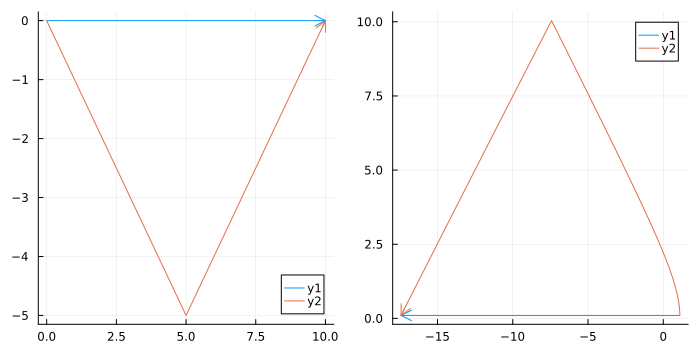

In [5]:
# Im z>0
let kv=collect(0:0.1:10),z=mσ+mN+0.5+0.1im
    kdeformed_v=vcat([(0.1-0.1im)*i for i in 0:1:50],[5-5im+(0.1+0.1im)*i for i in 0:1:50])
    resv1=zσ.(z,kv)
    resv2=zσ.(z,kdeformed_v)
    p1=plot(real.(kv),imag(kv),arrow=true)
    plot!(real.(kdeformed_v),imag(kdeformed_v),arrow=true)
    p2=plot(real.(resv1),imag.(resv1),arrow=true)
    plot!(real.(resv2),imag.(resv2),arrow=true)
    plot(p1,p2,layout=(1,2),size=(700,350))
end

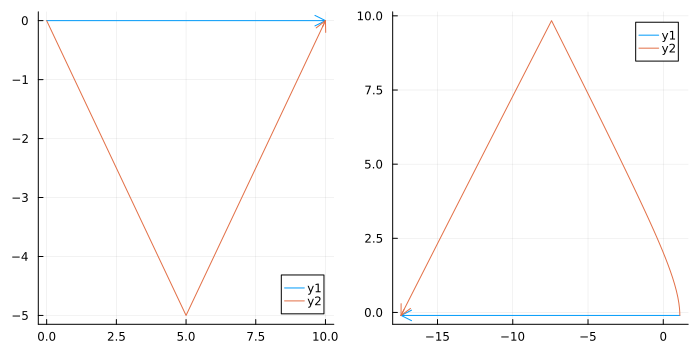

In [6]:
# Im z<0
let kv=collect(0:0.1:10),z=mσ+mN+0.5-0.1im
    kdeformed_v=vcat([(0.1-0.1im)*i for i in 0:1:50],[5-5im+(0.1+0.1im)*i for i in 0:1:50])
    resv1=zσ.(z,kv)
    resv2=zσ.(z,kdeformed_v)
    p1=plot(real.(kv),imag(kv),arrow=true)
    plot!(real.(kdeformed_v),imag(kdeformed_v),arrow=true)
    p2=plot(real.(resv1),imag.(resv1),arrow=true)
    plot!(real.(resv2),imag.(resv2),arrow=true)
    plot(p1,p2,layout=(1,2),size=(700,350))
end

# analytical continuation

In [12]:
plotly();

## form 1

In [5]:
mD=1.864;
mπ=0.134;
λ(x,y,z)=x^2+y^2+z^2-2*x*y-2*x*z-2*y*z;

In [6]:
function xsqrt(x)
    imag(x) >=0 ? sqrt(x+0im) : -sqrt(x-0im)
end
function qsq(E,m1,m2) 
    return λ(E^2,m1^2,m2^2)/(4E^2)
end

ρ(w,m1,m2) = xsqrt(qsq(w,m1,m2)+0im)/(8π*w);

In [10]:
function F(E,q,m1,m2,m3)
    msq_inv=(E-sqrt(m3^2+q^2))^2-q^2
    return xsqrt(λ(msq_inv,m1^2,m2^2))/(2*sqrt(msq_inv)) # not working
end

F (generic function with 1 method)

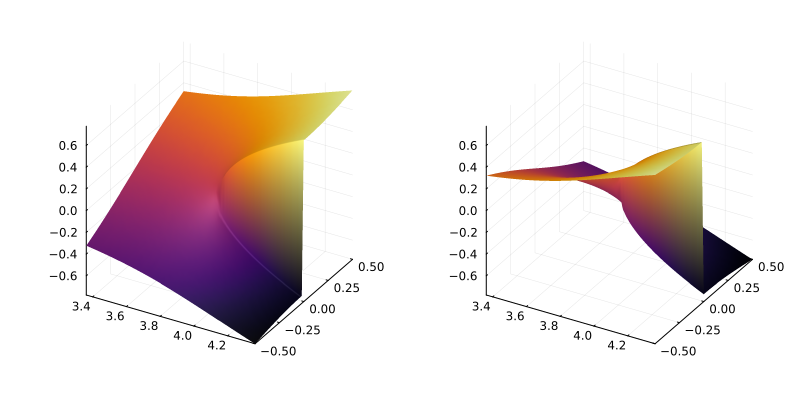

In [15]:
let Ev=collect(2mD+mπ-0.5:0.02:2mD+mπ+0.5),Γv=collect(-0.5:0.02:0.5)
    resv=[xsqrt(e+im*γ-2*mD-mπ) for γ in Γv,e in Ev]
    res1v=[-xsqrt(e+im*γ-2*mD-mπ) for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,real.(resv),legend=false)
    p2=surface(Ev,Γv,real.(res1v),legend=false)
    plot(p1,p2,layout=(1,2),size=(800,400))
end

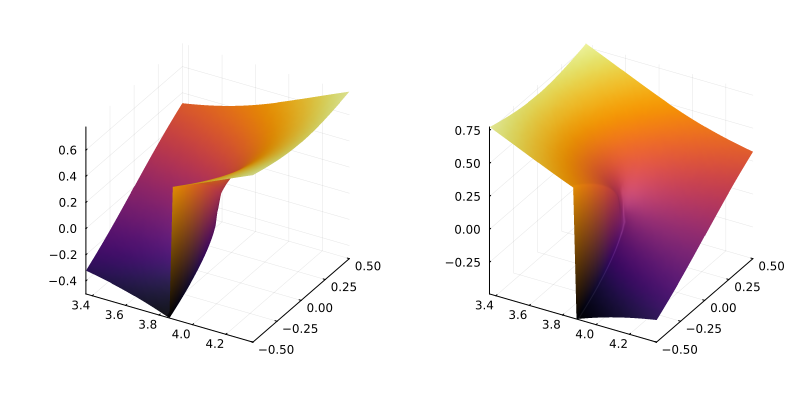

In [16]:
# redirecting branch cut
let Ev=collect(2mD+mπ-0.5:0.02:2mD+mπ+0.5),Γv=collect(-0.5:0.02:0.5)
    function Γr(e)
        if imag(e)<0&&real(e-2*mD-mπ)>0 
            return -xsqrt(e-2*mD-mπ)
        else
            return xsqrt(e-2*mD-mπ)
        end
    end
    resv=[Γr(e+im*γ) for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,real.(resv),legend=false)
    p2=surface(Ev,Γv,imag.(resv),legend=false)
    plot(p1,p2,layout=(1,2),size=(800,400))
end

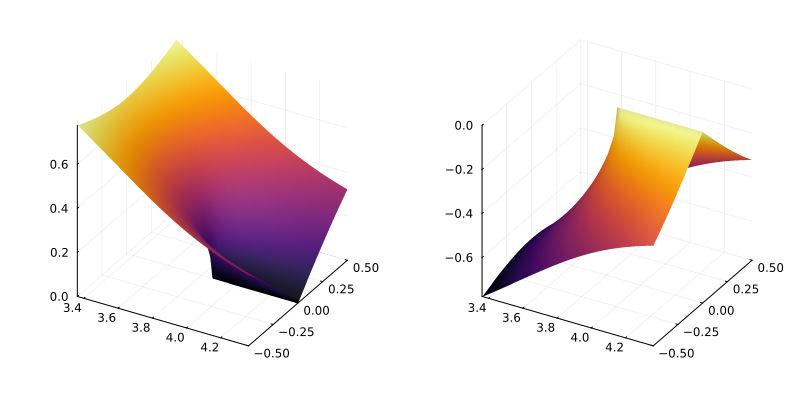

In [17]:
let Ev=collect(2mD+mπ-0.5:0.02:2mD+mπ+0.5),Γv=collect(-0.5:0.02:0.5)
    resv=[xsqrt(e+im*γ-2*mD-mπ) for γ in Γv,e in Ev]
    res1v=[-xsqrt(e+im*γ-2*mD-mπ) for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,imag.(resv),legend=false)
    p2=surface(Ev,Γv,imag.(res1v),legend=false)
    plot(p1,p2,layout=(1,2),size=(800,400))
end

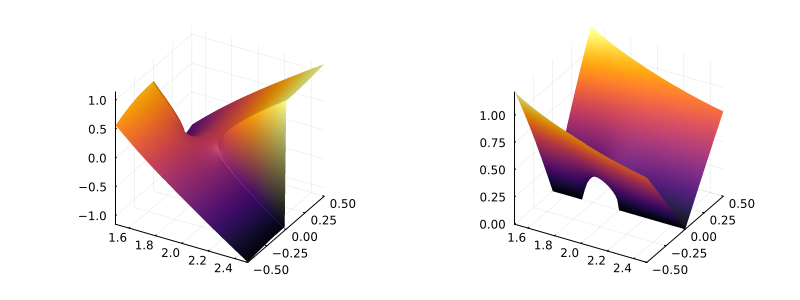

In [18]:
let Ev=collect(mD+mπ-0.5:0.02:mD+mπ+0.5),Γv=collect(-0.5:0.02:0.5)
    resv=[xsqrt(λ((e+im*γ)^2,mD^2,mπ^2))/(e+im*γ) for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,real.(resv),legend=false)
    p2=surface(Ev,Γv,imag.(resv),legend=false)
    plot(p1,p2,layout=(1,2),size=(800,300))
end

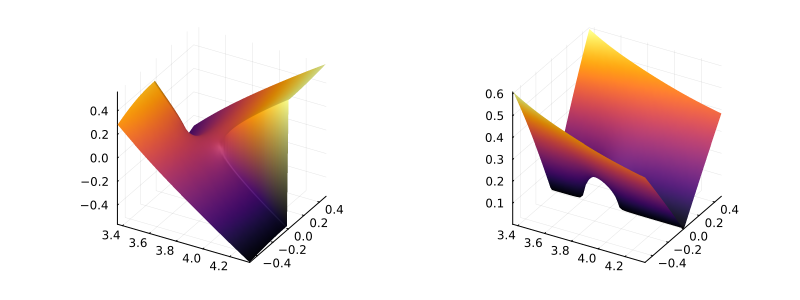

In [19]:
let Ev=collect(2mD+mπ-0.5:0.021:2mD+mπ+0.5),Γv=collect(-0.5:0.021:0.5)
    resv=[F(e+im*γ,0,mD,mπ,mD) for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,real.(resv),legend=false)
    p2=surface(Ev,Γv,imag.(resv),legend=false)
    plot(p1,p2,layout=(1,2),size=(800,300))
end

# $\mathcal{F}$ and $\tilde{\mathcal{F}}$

In [3]:
mDc=1.86961;
mDn=1.86484;
mDsc=2.01026;
mDsn=2.00696;
mπc=0.13957018;
mπn=0.1349766;

In [4]:
function xsqrt(x)
    imag(x) >=0 ? sqrt(x+0im) : -sqrt(x-0im)
end

xsqrt (generic function with 1 method)

In [5]:
function F(E,q,m1,m2,m3,m12)
    E1=E+m12-sqrt(m12^2+q^2)-sqrt(m3^2+q^2)
    μ=(m1+m2)/(m1*m2)
    return xsqrt(2*μ*(E1-m1-m2))
end

F (generic function with 1 method)

In [6]:
function F1(E,q,m1,m2,m3,m12)
    E1=E+m12-sqrt(m12^2+q^2)-sqrt(m3^2+q^2)
    μ=(m1+m2)/(m1*m2)
    return (imag(E)<0&&real(E1)>(m1+m2)) ? -xsqrt(2*μ*(E1-m1-m2)) : xsqrt(2*μ*(E1-m1-m2))
end

F1 (generic function with 1 method)

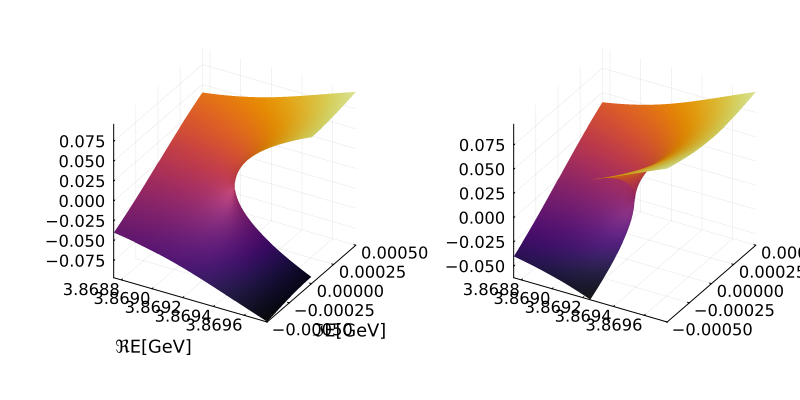

In [7]:
# gr()
let Ev=collect(mDn+mπc+mDn-500e-6:1e-6:mDn+mπc+mDn+500e-6),Γv=collect(-500e-6:1e-6:500e-6)
    resv1=[(e>(mDn+mπc+mDn)&&γ==-1e-6) ? NaN : F(e+im*γ,0,mDn,mπc,mDn,mDsc) for γ in Γv,e in Ev] 
    resv2=[(e==(mDn+mπc+mDn-1e-6)&&γ<0) ? NaN : F1(e+im*γ,0,mDn,mπc,mDn,mDsc) for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,real.(resv1),legend=false,xlabel="ℜE[GeV]",ylabel="ℑE[GeV]")
    p2=surface(Ev,Γv,real.(resv2),legend=false)#, camera = (20, 20))
    plot(p1,p2,layout=(1,2),size=(800,400))
#     savefig("../images/self-energy.png")
end

In [24]:
let Ev=collect(mDn+mπc+mDn-500e-6:1e-6:mDn+mπc+mDn+500e-6),Γv=collect(-500:1:500)
    resv1=[(e>(mDn+mπc+mDn)&&γ==-1) ? NaN : F(e+im*γ*1e-6,0,mDn,mπc,mDn,mDsc)*1e3 for γ in Γv,e in Ev] 
    resv2=[(e==(mDn+mπc+mDn-1e-6)&&γ<0) ? NaN : F1(e+im*γ*1e-6,0,mDn,mπc,mDn,mDsc)*1e3 for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,real.(resv1),legend=false,xlabel="ℜE[GeV]",ylabel="ℑE[keV]",zlabel=L"\Re\mathcal{F}[MeV]",color=cgrad(:blues))
    p2=surface(Ev,Γv,real.(resv2),legend=false,xlabel="ℜE[GeV]",ylabel="ℑE[keV]",zlabel=L"\Re\tilde{\mathcal{F}}[MeV]",color=cgrad(:blues))#, camera = (20, 20))
    plot(p1,p2,layout=(1,2),size=(800,400))
    savefig("./images/self-energy.pdf")
end

"/Users/qiulin/Nutstore Files/Nutstore/Projects/gitrepos/Tcc/LSE/images/self-energy.pdf"

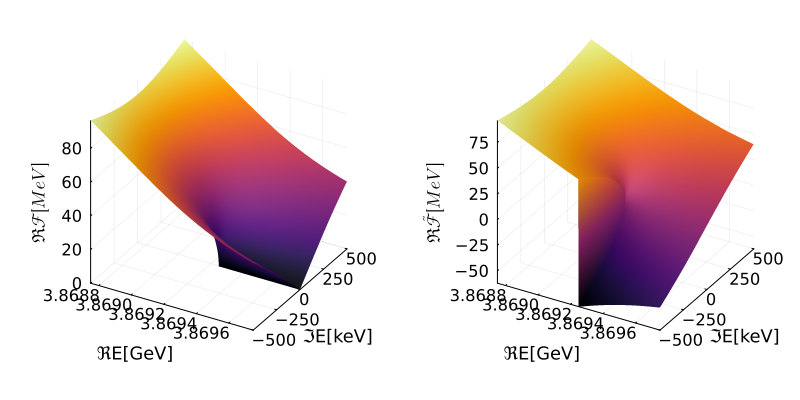

In [9]:
let Ev=collect(mDn+mπc+mDn-500e-6:1e-6:mDn+mπc+mDn+500e-6),Γv=collect(-500:1:500)
    resv1=[(e>(mDn+mπc+mDn)&&γ==-1) ? NaN : F(e+im*γ*1e-6,0,mDn,mπc,mDn,mDsc)*1e3 for γ in Γv,e in Ev] 
    resv2=[(e==(mDn+mπc+mDn-1e-6)&&γ<0) ? NaN : F1(e+im*γ*1e-6,0,mDn,mπc,mDn,mDsc)*1e3 for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,imag.(resv1),legend=false,xlabel="ℜE[GeV]",ylabel="ℑE[keV]",zlabel=L"\Re\mathcal{F}[MeV]")
    p2=surface(Ev,Γv,imag.(resv2),legend=false,xlabel="ℜE[GeV]",ylabel="ℑE[keV]",zlabel=L"\Re\tilde{\mathcal{F}}[MeV]")#, camera = (20, 20))
    plot(p1,p2,layout=(1,2),size=(800,400))
#     savefig("../images/self-energy.png")
end

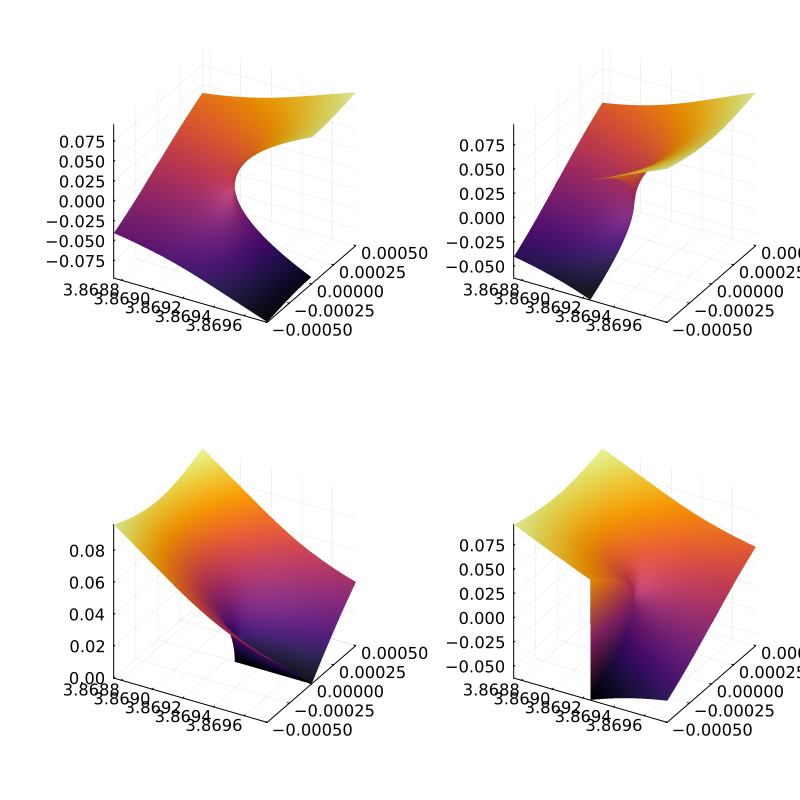

In [10]:
# gr()
let Ev=collect(mDn+mπc+mDn-500e-6:1e-6:mDn+mπc+mDn+500e-6),Γv=collect(-500e-6:1e-6:500e-6)
    resv1=[(e>(mDn+mπc+mDn)&&γ==-1e-6) ? NaN : F(e+im*γ,0,mDn,mπc,mDn,mDsc) for γ in Γv,e in Ev] 
    resv2=[(e==(mDn+mπc+mDn-1e-6)&&γ<0) ? NaN : F1(e+im*γ,0,mDn,mπc,mDn,mDsc) for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,real.(resv1),legend=false)
    p2=surface(Ev,Γv,real.(resv2),legend=false)
    p3=surface(Ev,Γv,imag.(resv1),legend=false)
    p4=surface(Ev,Γv,imag.(resv2),legend=false)
    plot(p1,p2,p3,p4,layout=(2,2),size=(800,800))
end

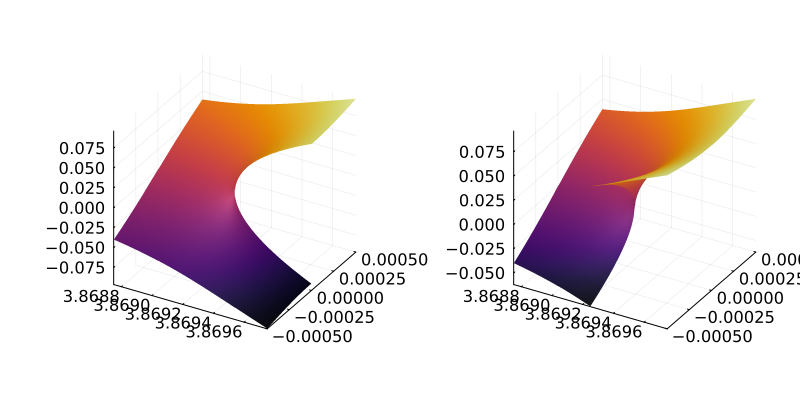

In [13]:
# plotly()
let Ev=collect(mDn+mπc+mDn-500e-6:1e-6:mDn+mπc+mDn+500e-6),Γv=collect(-500e-6:1e-6:500e-6)
    resv1=[(e>(mDn+mπc+mDn)&&γ==-1e-6) ? NaN : F(e+im*γ,0,mDn,mπc,mDn,mDsc) for γ in Γv,e in Ev] 
    resv2=[(e==(mDn+mπc+mDn-1e-6)&&γ<0) ? NaN : F1(e+im*γ,0,mDn,mπc,mDn,mDsc) for γ in Γv,e in Ev]
    p1=surface(Ev,Γv,real.(resv1),legend=false)
    p2=surface(Ev,Γv,real.(resv2),legend=false)
    plot(p1,p2,layout=(1,2),size=(800,400))
#     savefig("../images/self-energy.png")
end